In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/EUR_STOCK_DATA.csv')

In [ ]:
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [ ]:
print(type(df["Gmt time"].iloc[0]))

<class 'str'>


In [ ]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
df['Gmt time']=pd.to_datetime(df['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  # 0th index has date 1st has Month 2nd has year
  # 2012-12-17 04:00:00 .datetime()
  # 2012-12-17 .date()
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=df[df["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

In [ ]:
'''def return_data_for_period():
    date1 = pd.to_datetime(input("Enter first Date for time period (format: D.M.Y): "), dayfirst=True)
    date2 = pd.to_datetime(input("Enter Second Date for time period (format: D.M.Y): "), dayfirst=True)
    return df[(df['Gmt time'] > date1) & (df['Gmt time'] < date2)]'''

Enter first Date for time period format D.M.Y :- 14.12.2012
Enter Second Date for time period format D.M.Y :- 30.12.2012


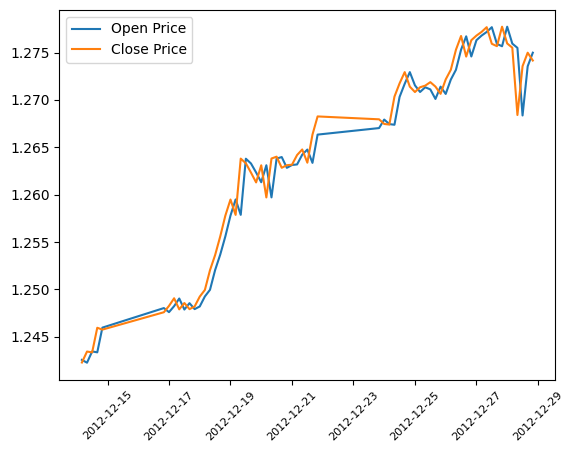

In [ ]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

Enter first Date for time period format D.M.Y :- 14.12.2012
Enter Second Date for time period format D.M.Y :- 30.12.2012


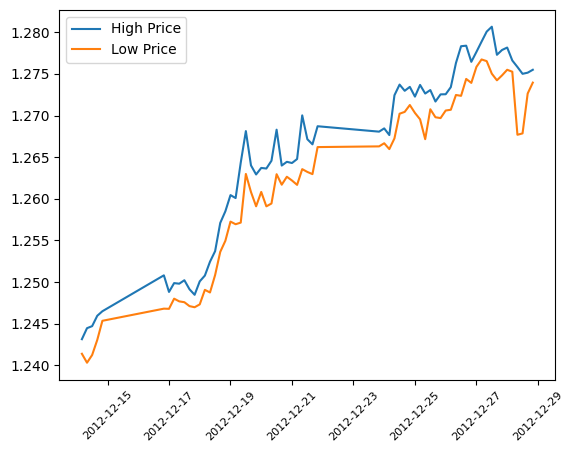

In [ ]:
low_high_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['High'],label="High Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Low'],label="Low Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [ ]:
# Data Preprocessing and Cleaning and EDA
# Making More features from current features to help the model learn better

In [ ]:
# Plot Open vs Close Between any time period entered by the user
# Plot High vs Low Between any time period entered by the user
# Check which months over the year had highest Volume
# Study what are technical Indicators
# See Seasonal Trends in Closing Price and Find out the months for high Volitality

In [ ]:
# Check which months over the year had highest Volume
# caluclate mean volume for each month each year
# 1 data frames that has 12 jan,feb,march,april,may,june,july..... and rows will be number of year

In [ ]:
# Check which months over the year had highest Volume

df['Month'] = df['Gmt time'].dt.month  #Extract month from 'Gmt time'
print(df['Month'])

monthly_volume = df.groupby('Month')['Volume'].mean()  #total volume for each month

print(monthly_volume)

highest_volume_months = monthly_volume[monthly_volume == monthly_volume.max()]
#highest_volume_months=monthly_volume.max()
print(highest_volume_months)


0        12
1        12
2        12
3        12
4        12
         ..
12885    11
12886    11
12887    11
12888    11
12889    11
Name: Month, Length: 12890, dtype: int64
Month
1     29711.531764
2     29080.248428
3     31942.057793
4     27488.829369
5     27571.194722
6     29604.812321
7     30358.712465
8     30703.830338
9     31694.943921
10    28434.380862
11    26598.877652
12    24932.630240
Name: Volume, dtype: float64
Month
3    31942.057793
Name: Volume, dtype: float64


In [ ]:
#plt.plot('Month','monthly_volume')

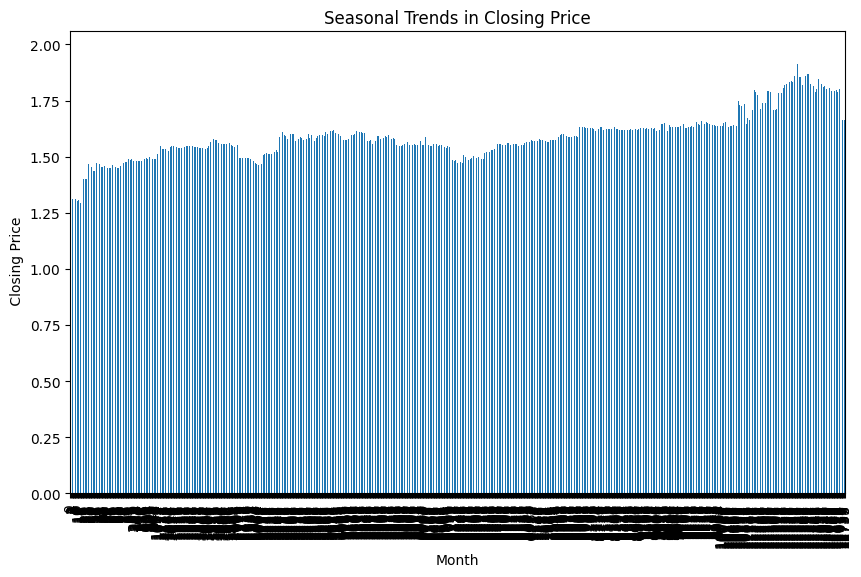

In [ ]:
#See Seasonal Trends in Closing Price and Find out the months for high Volitality

df['Month'] = df['Gmt time'].dt.month

monthly_closing_price = df.groupby('Month')['Close']

monthly_closing_price.plot.bar(x='Month', y='Close', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel(' Closing Price')
plt.title('Seasonal Trends in Closing Price')
plt.show()

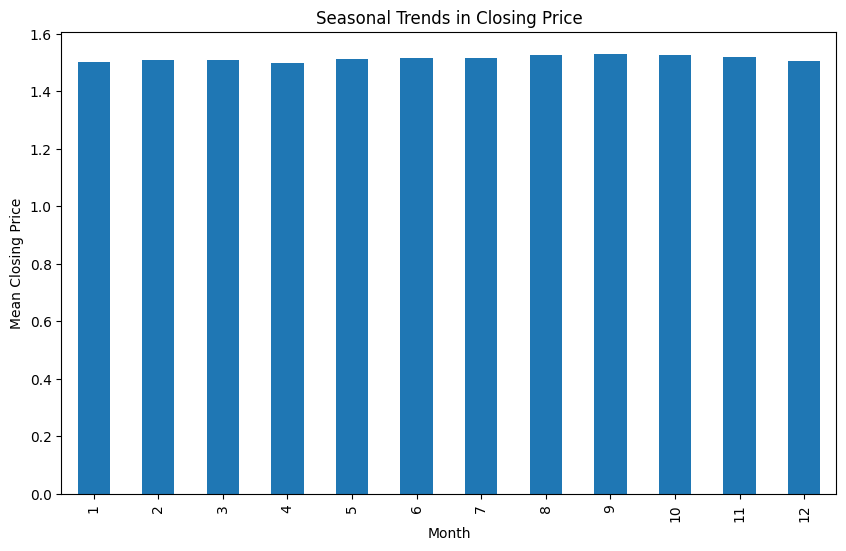

In [ ]:
df['Month'] = df['Gmt time'].dt.month

monthly_mean_closing_price = df.groupby('Month')['Close'].mean()

monthly_mean_closing_price.plot.bar(x='Month', y='Mean Closing Price', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Mean Closing Price')
plt.title('Seasonal Trends in Closing Price')
plt.show()

In [ ]:
monthly_volatility = df.groupby('Month')['Close'].std()
print(monthly_volatility)
high_volatility_months = monthly_volatility[monthly_volatility > monthly_volatility.mean()]
print(high_volatility_months)
print("Months with high volatility:")
for month in high_volatility_months.index:
    print(month)

Month
1     0.107728
2     0.106981
3     0.141377
4     0.117578
5     0.101301
6     0.086792
7     0.085486
8     0.088933
9     0.088107
10    0.092955
11    0.084776
12    0.103616
Name: Close, dtype: float64
Month
1     0.107728
2     0.106981
3     0.141377
4     0.117578
5     0.101301
12    0.103616
Name: Close, dtype: float64
Months with high volatility:
1
2
3
4
5
12


In [ ]:
# Simple moving Average

# Cumulative Moving Average

# Explonentital Movie Average

In [ ]:
df

,Gmt time,Volume,Open,High,Low,Close,Month
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,12
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,12
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,12
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,12
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,12
...,...,...,...,...,...,...,...
12885,2020-11-12 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455,11
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935,11
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745,11
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315,11


Enter the time period:4
0       2012-12-12 00:00:00
1       2012-12-12 04:00:00
2       2012-12-12 08:00:00
3       2012-12-12 12:00:00
4       2012-12-12 16:00:00
                ...        
12755   2020-12-11 04:00:00
12756   2020-12-11 08:00:00
12757   2020-12-11 12:00:00
12758   2020-12-11 16:00:00
12759   2020-12-11 20:00:00
Name: Date, Length: 12890, dtype: datetime64[ns]
                 Gmt time      Volume      Open      High       Low     Close  \
0     2012-12-12 00:00:00  11011.3902  1.234920  1.235890  1.233830  1.235200   
1     2012-12-12 04:00:00  13271.5599  1.235210  1.235510  1.233860  1.234340   
2     2012-12-12 08:00:00  26716.2305  1.234350  1.236370  1.233305  1.234905   
3     2012-12-12 12:00:00  28430.1602  1.234910  1.237285  1.234850  1.236810   
4     2012-12-12 16:00:00  33124.1904  1.236800  1.238700  1.236285  1.238205   
...                   ...         ...       ...       ...       ...       ...   
12755 2020-12-11 04:00:00  24188.9395  1.618380  1.6

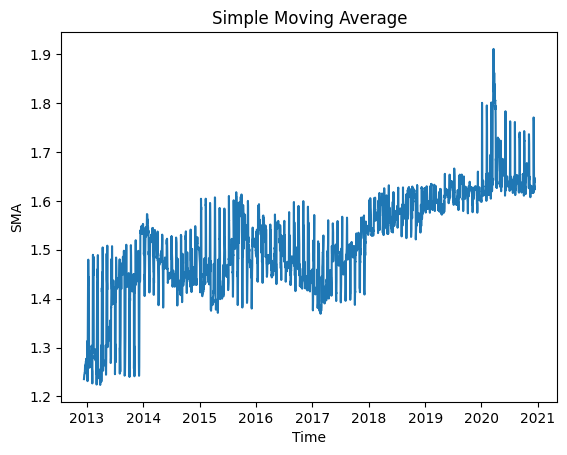

In [ ]:
# Simple moving Average
df['Month'] = df['Gmt time'].dt.month

period=int(input("Enter the time period:"))
df['Date'] = pd.to_datetime(df['Gmt time'])
print(df['Date'])

df = df.sort_values('Date')
df['SMA'] = df['Close'].rolling(window=period).mean()

# Print the DataFrame with SMA column
print(df)
x = df['Gmt time']
y = df['SMA']

# Plot the SMA
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('SMA')
plt.title('Simple Moving Average')
plt.show()

12886


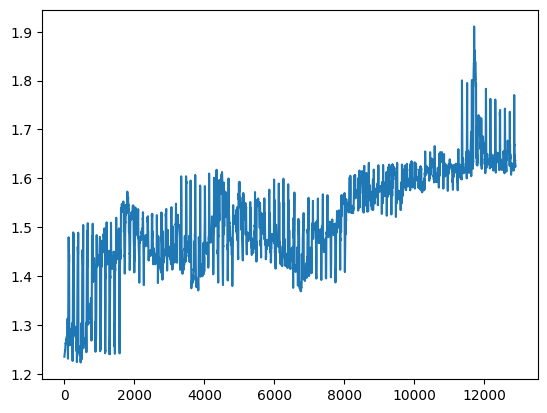

In [ ]:

lst_simple_avg=[]

for i in range(4,len(df.index)):

  lst_simple_avg.append(df.Close.iloc[(i-4):i].mean())

print(len(lst_simple_avg))



plt.plot(lst_simple_avg)





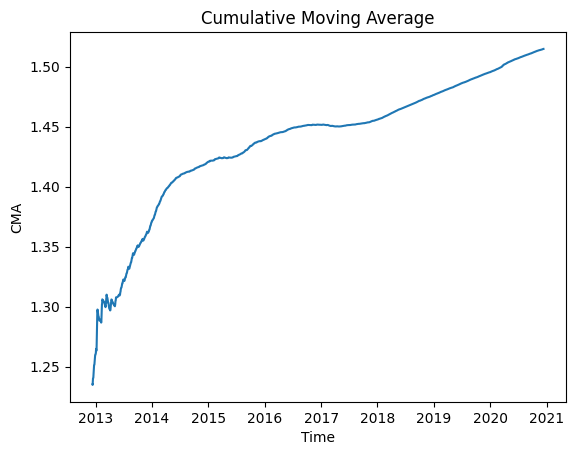

In [ ]:
# Calculate the cumulative moving average (CMA) using cumsum() and cumcount() functions
 #Convert 'Gmt time' column to datetime format
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# Sort the DataFrame by date in ascending order
df = df.sort_values('Gmt time')

# Calculate the cumulative moving average (CMA) using a loop
cma_values = []
cumulative_sum = 0

for i, close_price in enumerate(df['Close']):
    cumulative_sum += close_price
    cma = cumulative_sum / (i + 1)
    cma_values.append(cma)

# Add CMA values to the DataFrame
df['CMA'] = cma_values

# Extract x and y values
x = df['Gmt time']
y = df['CMA']

# Plot the CMA
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('CMA')
plt.title('Cumulative Moving Average')
plt.show()

[nan, 1.2352, 1.2347700000000001, 1.234815, 1.23531375, 1.235892, 1.2364058333333332, 1.2368714285714284, 1.237206875, 1.237325, 1.237667, 1.2382045454545454, 1.2385004166666667, 1.2388096153846153, 1.2390564285714285, 1.2393476666666665, 1.239596875, 1.239969705882353, 1.2402902777777778, 1.2406736842105264, 1.24105225, 1.2414330952380954, 1.2417261363636365, 1.2420228260869566, 1.2422677083333333, 1.2425044, 1.2427628846153846, 1.2430283333333334, 1.2433492857142858, 1.2437032758620692, 1.2440993333333334, 1.2445408064516128, 1.2450076562499999, 1.2453969696969696, 1.2459382352941175, 1.2464344285714286, 1.2468756944444446, 1.2472651351351352, 1.2476817105263158, 1.2479898717948719, 1.248385375, 1.2487663414634145, 1.2491011904761904, 1.2494268604651162, 1.2497388636363636, 1.2500597777777778, 1.250379456521739, 1.2506558510638297, 1.2509824999999999, 1.251335, 1.2516673, 1.2519769607843136, 1.2522734615384614, 1.2526144339622642, 1.2529687037037036, 1.2533317272727273, 1.253654375, 

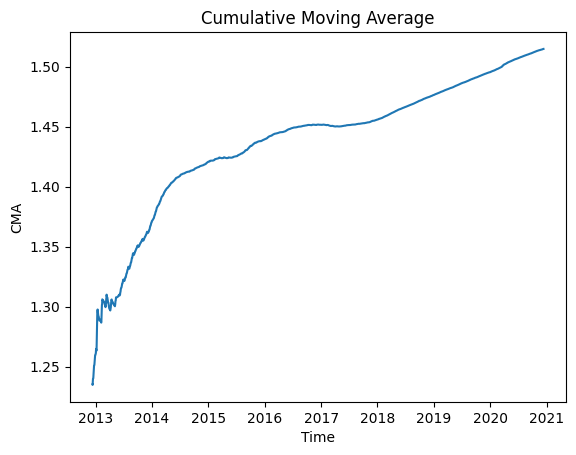

In [ ]:
# Convert 'Gmt time' column to datetime format
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# Sort the DataFrame by date in ascending order
df = df.sort_values('Gmt time')

lst_cum_avg = []

for i in range(len(df.index)):
    lst_cum_avg.append(df['Close'].iloc[0:i].mean())

print(lst_cum_avg)

# Extract x and y values
x = df['Gmt time']
y = lst_cum_avg

# Plot the CMA
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('CMA')
plt.title('Cumulative Moving Average')
plt.show()

In [ ]:
# MOVING AVERAGE, EXPONENTIAL MOVING AVERAGE, RSI, Cumlative MOving Average , Bolinge bands

# period 20,30,40